In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
# Unzipping the data in google drive remotely

from zipfile import ZipFile

with ZipFile('drive/MyDrive/Underwater_image_data/data_deepDark.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall("drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark")



In [5]:
# debugging the, if the unzipping was worked
os.listdir("drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark/data_deepDark/train")

['Crustacean', 'Fin_fish', 'Mollusk', 'Sea_urchin', 'Star_fish', 'String_ray']

In [6]:
# Create a drive 

if not os.path.exists("drive/MyDrive/Underwater_image_data/output"):
  os.mkdir("drive/MyDrive/Underwater_image_data/output")
else: pass


if not os.path.exists("drive/MyDrive/Underwater_image_data/output/graphs"):
  os.mkdir("drive/MyDrive/Underwater_image_data/output/graphs")
else:pass


if not os.path.exists("drive/MyDrive/Underwater_image_data/output/saved_weight"):
  os.mkdir("drive/MyDrive/Underwater_image_data/output/saved_weight")
else: pass


if not os.path.exists("drive/MyDrive/Underwater_image_data/output/data_output"):
  os.mkdir("drive/MyDrive/Underwater_image_data/output/data_output")
else: pass




In [19]:
#Importing the libarries to perform the DenseNet121 model
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import numpy as np
from keras.preprocessing import image

In [20]:




class neural_network(object):

    def __init__(self, 
                 base_model, 
                 train, test, 
                 epochs, opt, 
                 eval_image,
                 weight_path = "drive/MyDrive/Underwater_image_data/output/saved_weight",
                 
                 graphs_path = "drive/MyDrive/Underwater_image_data/output/graphs",
                 data_path = "drive/MyDrive/Underwater_image_data/output/data_output",

                 loss = 'categorical_crossentropy', 
                 metrics = 'accuracy'):
        self.base_model = base_model
    
        self.train = train
        self.test = test
        self.epochs = epochs
        self.opt = opt

        self.eval_image = eval_image
    

        self.weight_path = weight_path
        self.graphs_path = graphs_path
        self.data_path = data_path

        self.loss = loss
        self.metrics = metrics
        #self.artificial_being



    def test_accuracy(self,  model, test_set):
        loss,accuracy = model.evaluate(test_set)



        print("/n /n Test loss: {l} /n and Test accuracy: {a}/n".format(l = loss, a = accuracy))   

        import pandas as pd

        dic = {"loss":loss,
               "accuracy":accuracy}

        dt = pd.DataFrame(dic)

        dt.to_csv(self.data_path+self.base_model+self.opt+'.csv', index = False)

        return loss,accuracy
   

    def summary_of_history_plot(self, history):
      
        # list all data in history
        att = [i for i in history.history.keys()]
        

        
        # summarize history for accuracy
        plt.plot(history.history[att[1]])
        plt.plot(history.history[att[3]])
        #plt.title('Epoch wise model accuracy')
        #plt.ylabel('accuracy')
        #plt.xlabel('epoch')
        #plt.legend(['train', 'test'], loc='upper left')
        
        #plt.savefig(self.graphs_path+self.base_model+self.opt+'epoch_wise_accuracy'+'.png')
        #plt.show()


        # summarize history for loss
        plt.plot(history.history[att[0]])
        plt.plot(history.history[att[2]])
        #plt.title('Epoch wise model loss')
        plt.title('Epoch wise model accurcay and loss')
        #plt.ylabel('loss')
        plt.ylabel('accuracy/loss')
        plt.xlabel('epoch')
        plt.legend(['train_accuracy', 'test_accuracy', 'train_loss', 'test_loss'], loc='upper left')
        #plt.savefig(self.graphs_path+self.base_model+self.opt+'epoch_wise_loss'+'.png')
        plt.savefig(self.graphs_path+self.base_model+self.opt+'epoch_wise_accuracy_loss'+'.png')
        plt.show()


    def prediction_of_label(self, model,training_set ):
        # Predicting the final result of image with a test image

        
        test_image = image.load_img(self.eval_image, target_size = (224, 224))
        test_image = image.img_to_array(test_image)




 
        # Expanding the 3-d image to 4-d image.
        # The dimensions will be Batch, Height, Width, Channel
        test_image = np.expand_dims(test_image, axis = 0)




 
        # Predicting the final class
        result = model.predict(test_image)[0].argmax()





 
        # Fetching the class labels
        labels = training_set.class_indices
        labels = list(labels.items())
        print(labels)




 
        # Printing the final label
        for label, i in labels:
          
          if i == result:
            print("The given image is belongs to the class: ", label)
            break
  
    


    def artificial_intelligent_being(self):

        if self.base_model == "DenseNet121":
            # Download the architecture of DenseNet50 with ImageNet weights
            base_model = DenseNet121(weights='imagenet', include_top=False)
        elif self.base_model == "ResNet50":
            # Download the architecture of ResNet50 with ImageNet weights
            base_model = ResNet50(weights='imagenet', include_top=False)


  
        # Taking the output of the last convolution block in ResNet50
        x = base_model.output

        # Adding a Global Average Pooling layer
        x = GlobalAveragePooling2D()(x)

        # Adding a fully connected layer having 1024 neurons
        x = Dense(1024, activation='relu')(x)





        # Adding a fully connected layer having 2 neurons which will
        # give the probability of image having distinct label
        predictions = Dense(6, activation='softmax')(x)


        # Model to be trained
        model = Model(inputs=base_model.input, outputs=predictions)

        






        # Training only top layers i.e. the layers which we have added in the end
        for layer in base_model.layers:
            layer.trainable = False



    
        # Compiling the model

        if self.opt == 'SGD':
            opt = SGD(lr=0.0001, momentum=0.9)
        elif self.opt == 'adam':
            opt = 'adam'


        model.compile(optimizer= opt, loss= self.loss, metrics = [self.metrics])


        # Creating objects for image augmentations
        train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

   
        test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


        # Proving the path of training and test dataset

        # We are using class mode as binary because there are only two classes in our data
        train = self.train
        test = self.test
        training_set = train_datagen.flow_from_directory(train,
                                                 
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

        test_set = test_datagen.flow_from_directory(test,
                                           
                                            batch_size = 32,
                                            class_mode = 'categorical')
        


       


        # Training the model for 20 epochs
        history = model.fit_generator(training_set,
                    
                                       epochs = self.epochs,
                                       validation_data = test_set)

        

        
         
        
        print("\n\n")
        print("Providing intelligence to the model has completed!")

        # Test_accuracy

        #self.test_accuracy(model, test_set)

        # history plot
        
        base_model = self.base_model

        opt = self.opt

        print("\n\n")

        self.summary_of_history_plot(history)


        # Label prediction

        self.prediction_of_label(model,training_set)


        # Saving the weights in the current directory

        model.save_weights(self.weight_path+self.base_model+self.opt+"_weights.h5")
        
        
        


        #return model



    
        




        




       



        







   

The default test image is: drive/MyDrive/Underwater_image_data/132.jpg. 
 Would you like to keep the default test image directory? 
 Type Yes/No:
 

Yes
The default train directory is: drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark/data_deepDark/train. 
 Would you like to keep the default train directory? 
 Type Yes/No:
 

Yes
The default train directory is: drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark/data_deepDark/test. 
 Would you like to keep the default test directory? 
 Type Yes/No:
 

Yes

 
Please specify a base_model either DenseNet121 or ResNet50: 
 

ResNet50

 
Please specify the number of epoch:
 

20

 
Please specify a base_model either SGD or adam:
 

adam
The default weight_path to save mnodel weight is: drive/MyDrive/Underwater_image_data/output/saved_weight/. 
 Would you like to keep the default weight_path directory? 
 Type Yes/No:
 

Yes
The default graphs_path to save mnodel weight is: drive/MyDrive/Underwater_image_data/output/graphs/. 


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4/4 [==============================] - 34s 8s/step - loss: 1.8650 - accuracy: 0.4200 - val_loss: 2.1617 - val_accuracy: 0.2121
Epoch 2/20
4/4 [==============================] - 29s 7s/step - loss: 1.8055 - accuracy: 0.3200 - val_loss: 2.0729 - val_accuracy: 0.4242
Epoch 3/20
4/4 [==============================] - 30s 9s/step - loss: 1.6321 - accuracy: 0.3900 - val_loss: 1.7551 - val_accuracy: 0.2121
Epoch 4/20
4/4 [==============================] - 30s 7s/step - loss: 1.7099 - accuracy: 0.3900 - val_loss: 2.2336 - val_accuracy: 0.4242
Epoch 5/20
4/4 [==============================] - 29s 7s/step - loss: 1.7340 - accuracy: 0.5400 - val_loss: 1.7228 - val_accuracy: 0.4242
Epoch 6/20
4/4 [==============================] - 29s 7s/step - loss: 1.6588 - accuracy: 0.3800 - val_loss: 1.6620 - val_accuracy: 0.4545
Epoch 7/20
4/4 [==============================] - 29s 9s/step - loss: 1.4824 - accuracy: 0.5400 - val_loss: 1.8842 - val_accuracy: 0.4242
Epoch 8/20
4/4 [==================

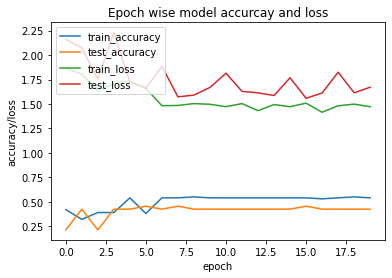

[('Crustacean', 0), ('Fin_fish', 1), ('Mollusk', 2), ('Sea_urchin', 3), ('Star_fish', 4), ('String_ray', 5)]
The given image is belongs to the class:  Crustacean


In [22]:

# Automation:




def automate():

  train = "drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark/data_deepDark/train"
  test = "drive/MyDrive/Underwater_image_data/Unzipped_data_deepDark/data_deepDark/test"
  

  
  eval_image = "drive/MyDrive/Underwater_image_data/132.jpg"
  weight_path = "drive/MyDrive/Underwater_image_data/output/saved_weight/"
                 
  graphs_path = "drive/MyDrive/Underwater_image_data/output/graphs/"
  data_path = "drive/MyDrive/Underwater_image_data/output/data_output/"

  loss = 'categorical_crossentropy'
  metrics = 'accuracy'

  print("The default test image is: {ti}. \n Would you like to keep the default test image directory? \n Type Yes/No:\n \n".format(ti= eval_image))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the test image directory in the following:\n\n")

    address = input()


  print("The default train directory is: {train}. \n Would you like to keep the default train directory? \n Type Yes/No:\n \n".format(train = train))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the train directory in the following:\n\n")

    address = input()

    train = address
  else: pass


  print("The default train directory is: {test}. \n Would you like to keep the default test directory? \n Type Yes/No:\n \n".format(test = test))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the test directory in the following:\n\n")

    address = input()

    test = address
  else: pass


  print("\n \nPlease specify a base_model either DenseNet121 or ResNet50: \n \n")
  base_model = input()
  
  print("\n \nPlease specify the number of epoch:\n \n")
  epochs = int(input())
  
  print("\n \nPlease specify a base_model either SGD or adam:\n \n")
  opt = input()

  print("The default weight_path to save mnodel weight is: {path}. \n Would you like to keep the default weight_path directory? \n Type Yes/No:\n \n".format(path = weight_path))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the weight_path directory in the following:\n\n")

    address = input()

    path = address
  else: pass


  print("The default graphs_path to save mnodel weight is: {path}. \n Would you like to keep the default graphs_path directory? \n Type Yes/No:\n \n".format(path = graphs_path))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the garphs_path directory in the following:\n\n")

    address = input()

    path = address
  else: pass


  print("The default data_path to save mnodel weight is: {path}. \n Would you like to keep the default graphs_path directory? \n Type Yes/No:\n \n".format(path = data_path))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the address of the data_path directory in the following:\n\n")

    address = input()

    path = address
  else: pass


  print("The default loss function is: {loss}. \n Would you like to keep the default loss function? \n Type Yes/No:\n \n".format(loss = loss))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the name of loss function in the following:\n\n")

    address = input()

    path = address
  else: pass


  print("The default accuracy function is: {met}. \n Would you like to keep the default accuracy function? \n Type Yes/No:\n \n".format(met = metrics))

  ans = input()

  if ans == "No":
    print("\n\nPlease type the name of loss function in the following:\n\n")

    address = input()

    path = address
  else: pass


  nn = neural_network(base_model, train, test, epochs, opt,eval_image,weight_path,graphs_path,data_path, loss, metrics)

  nn.artificial_intelligent_being()

  
    



automate()
  